In [1]:
from sklearn import datasets
df = datasets.load_boston()

In [2]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
X = df['data']
y = df['target'].reshape(-1,1)

### Lasso Regression

In [4]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)

In [5]:
lasso.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [6]:
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.          0.         -0.          0.         -0.          2.95469455
 -0.          0.         -0.         -0.         -0.24795837  0.
 -0.42817439]


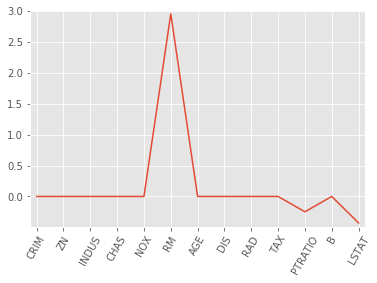

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(range(len(lasso_coef)), lasso_coef)
plt.xticks(range(len(lasso_coef)), df['feature_names'], rotation=60);
plt.margins(0.02);

RM, PTRATIO and LSTAT are the selected features accordingly with Lasso regression

### Ridge Regression

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [10]:
import numpy as np

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [11]:
ridge = Ridge(normalize=True)

In [12]:
# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

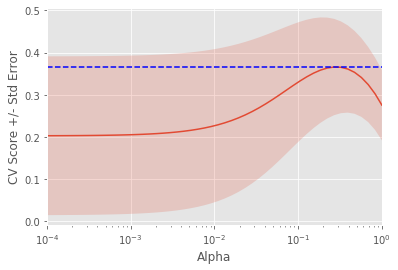

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(alpha_space, ridge_scores);

std_error = ridge_scores_std / np.sqrt(10)

ax.fill_between(alpha_space, ridge_scores + std_error, ridge_scores - std_error, alpha=0.2);
ax.set_ylabel('CV Score +/- Std Error');
ax.set_xlabel('Alpha');
ax.axhline(np.max(ridge_scores), linestyle='--', color='blue');
ax.set_xlim([alpha_space[0], alpha_space[-1]]);
ax.set_xscale('log');